# Previsão da nota de matemática de alunos que fizeram o enem 2019 na Paraíba

**Vamos primeiro converter o .txt para um arquivo .csv. Após executado uma vez, esse trecho de código pode ser ignorado**

In [29]:
import csv

file = open('Selec_PB.txt', 'r')

dataset = list()

for line in file:
    row=line.split(';')
    dataset.append(row)
    

with open('enem2019pb.csv', 'w', newline='') as file2:
    writer= csv.writer(file2)
    writer.writerows(dataset)


**Vamos agora separar nossos 2 datasets, utilizaremos um dataset de treino com 147000 entradas e um dataset de teste com 780 entradas**

In [4]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df_test = pd.read_csv('enem2019pb.csv', nrows=779)
df = pd.read_csv('enem2019pb.csv', skiprows=[i for i in range(1,780)])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147001 entries, 0 to 147000
Columns: 137 entries, ID to Q025 

dtypes: float64(24), int64(72), object(41)
memory usage: 153.6+ MB


In [58]:
df

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025 \n
0,450717,190001455354,2019,2516201,Sousa,25,PB,19,M,1,...,A,A,A,B,B,A,B,A,A,A \n
1,450718,190001455355,2019,2507507,João Pessoa,25,PB,21,M,1,...,A,A,A,B,B,A,D,A,B,B \n
2,450719,190001455356,2019,2501005,Araruna,25,PB,18,F,1,...,A,A,B,B,A,A,C,A,A,B \n
3,450720,190001455357,2019,2507507,João Pessoa,25,PB,50,M,2,...,A,A,A,C,B,B,B,A,B,B \n
4,450721,190001455358,2019,2504009,Campina Grande,25,PB,34,F,2,...,A,A,A,B,A,A,C,A,B,B \n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146996,5094930,190006119856,2019,2516508,Taperoá,25,PB,22,F,1,...,A,A,A,B,A,A,E,A,A,B \n
146997,5094931,190006119857,2019,2504009,Campina Grande,25,PB,22,F,1,...,B,A,A,C,A,A,D,A,A,B \n
146998,5094932,190006119858,2019,2500601,Alhandra,25,PB,19,F,1,...,A,A,A,B,A,A,B,A,A,A \n
146999,5094933,190006119859,2019,2509107,Mari,25,PB,16,F,1,...,A,A,A,B,A,A,D,A,B,B \n


**Agora, vamos verificar os participantes do enem 2019 por cidade da paraíba. Para melhor observação do nome das cidades, alterar o figsize para (300,240) e dar zoom na imagem**

Text(0.5, 1.0, 'Cidades dos participantes do enem 2019')

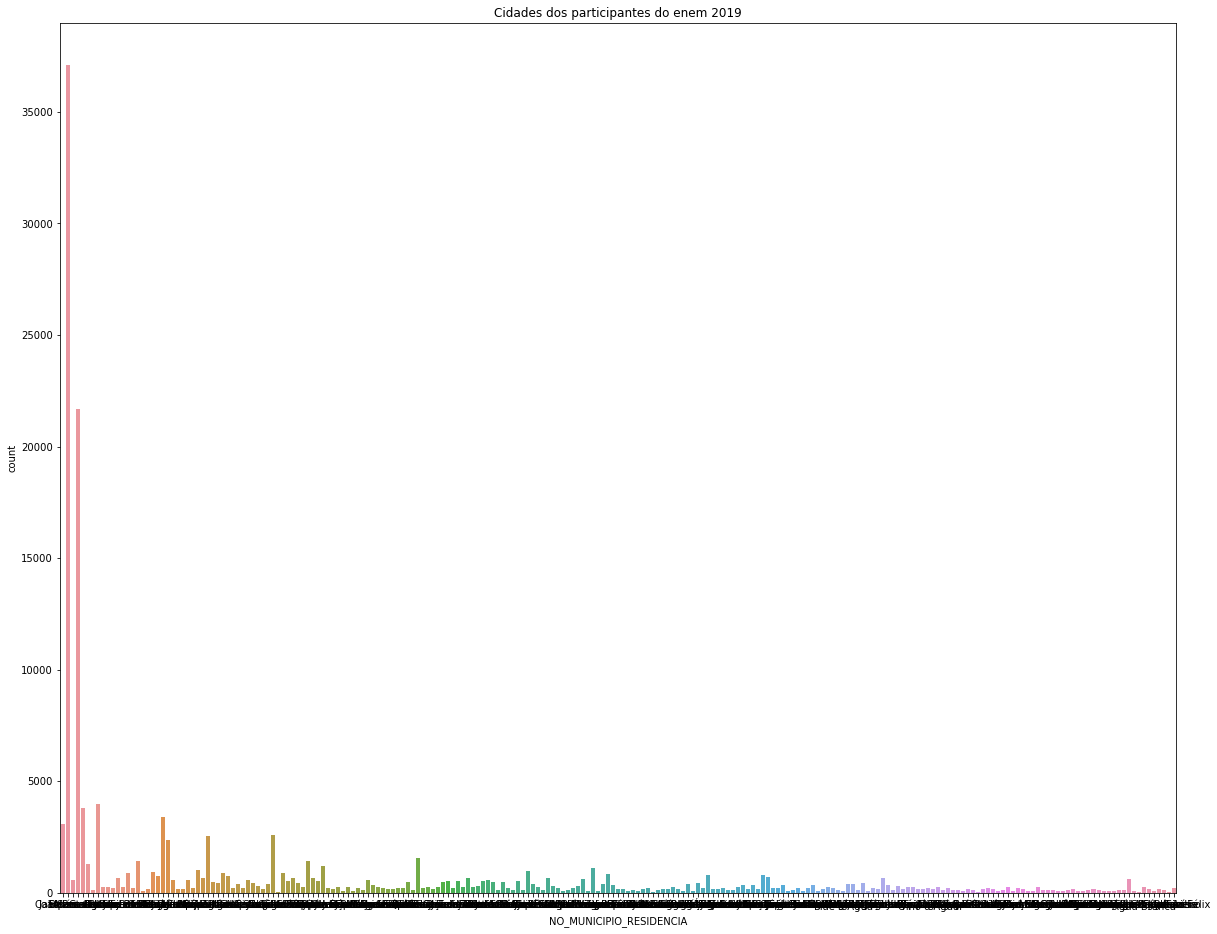

In [8]:
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (20,16))
sns.countplot(df['NO_MUNICIPIO_RESIDENCIA'])
plt.title('Cidades dos participantes do enem 2019')

**Vamos ver agora, a distribuição das idades dos participantes (clique duplo para ver melhor)**

Text(0.5, 1.0, 'Idade dos participantes do enem 2019 - PB')

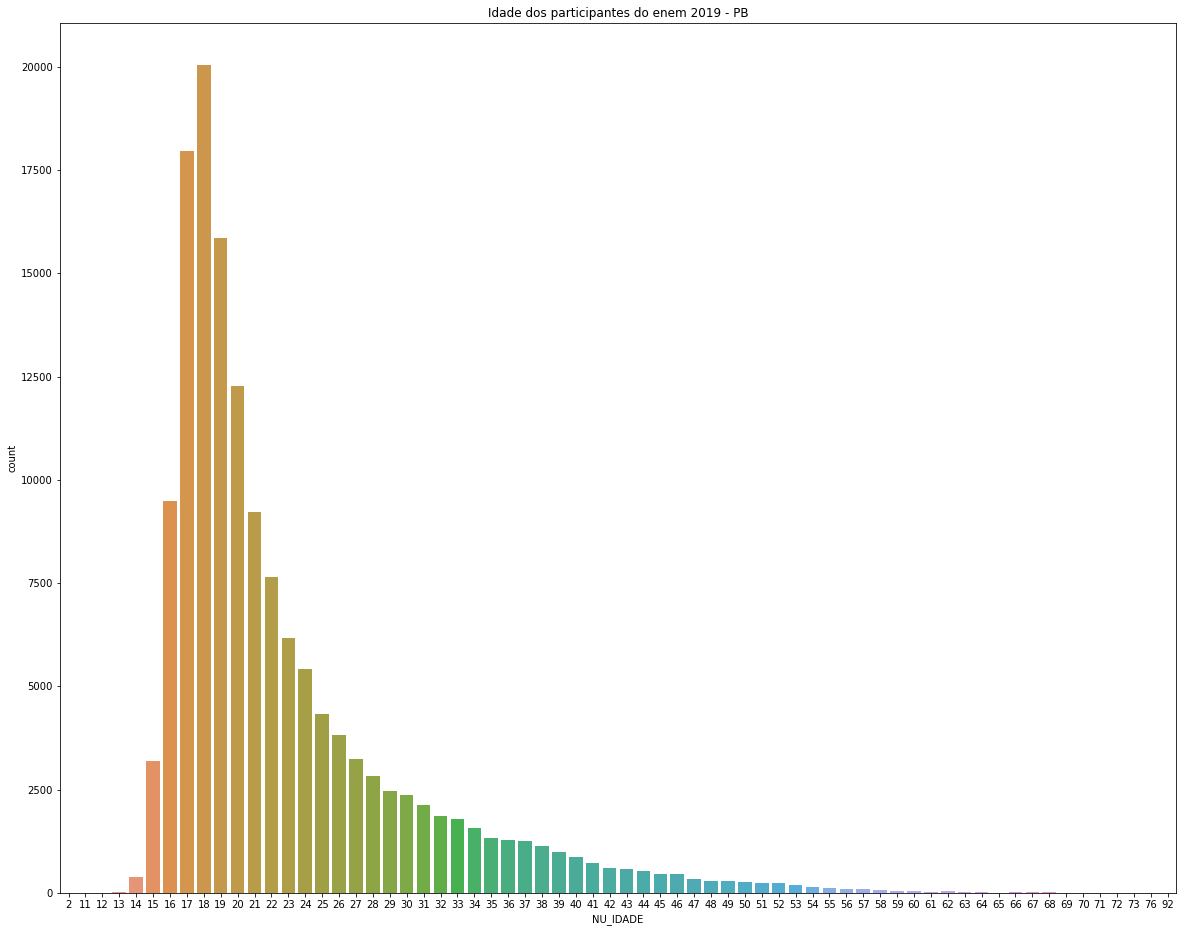

In [9]:
sns.countplot(df['NU_IDADE'])
plt.title('Idade dos participantes do enem 2019 - PB')

**A distribuição dos participantes por gênero**

Text(0.5, 1.0, 'Gênero dos participantes do enem 2019-PB')

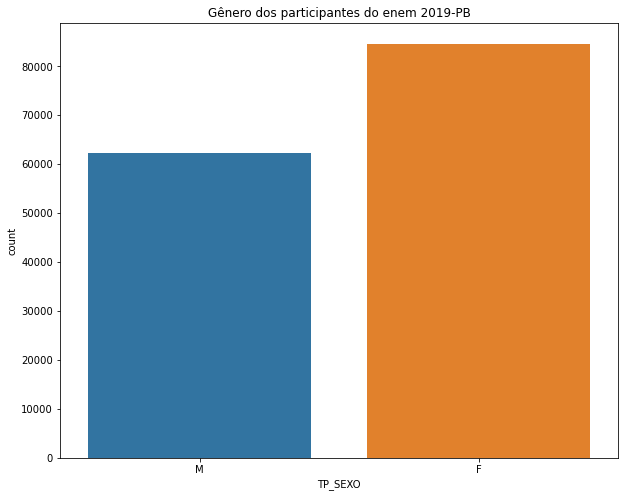

In [11]:
plt.rc('figure', figsize = (10,8))
sns.countplot(df['TP_SEXO'])
plt.title('Gênero dos participantes do enem 2019-PB')

A partir desses dados, podemos notar que


1) A maior parte dos participantes são do gênero feminino

2) A maior parte dos participantes tem 17-18 anos

3) A maior parte dos participantes são de João Pessoa e Campina Grande

**Vamos analisar agora quantas pessoas fizeram a prova de matemática**

In [20]:
mat = df['TP_PRESENCA_MT'].value_counts()
mat

1    113611
0     33337
2        53
Name: TP_PRESENCA_MT, dtype: int64

In [23]:
porcentagem = mat[1]*100/df.shape[0]
print('Das {} pessoas que fizeram o enem 2019, apenas {} fizeram a prova de matemática, resultando em {}%'.format(df.shape[0], mat[1], porcentagem))

Das 147001 pessoas que fizeram o enem 2019, apenas 113611 fizeram a prova de matemática, resultando em 77.28586880361358%


**Dessas pessoas, 33390 pessoas não fizeram a prova de matemática**

In [34]:
df[df['NU_NOTA_MT']==0].shape[0]

26

**Das pessoas que fizeram a prova, apenas 26 zeraram**

In [41]:
nota_minima = df['NU_NOTA_MT'].min()
df['NU_NOTA_MT'].isnull().sum()


33390

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Density'>

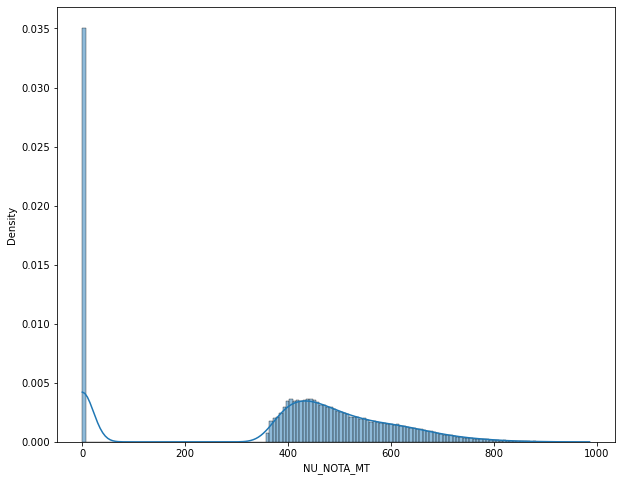

In [60]:
df.update(df['NU_NOTA_MT'].fillna(nota_minima))
sns.histplot(df['NU_NOTA_MT'], kde=True, stat='density')

In [61]:
df['NU_NOTA_MT'].mean()

394.02769641022746

**A maior parte das notas de matemática estão entre 400 e 500 pontos**

In [62]:
df['NU_NOTA_MT'].max()

985.5

**Essa foi a maior nota da prova de matemática. Vamos analisar agora se o tipo de escola diz algo sobre a nota**

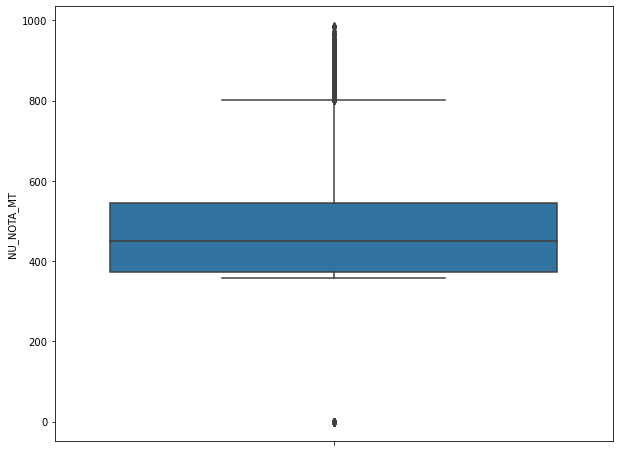

In [75]:
ax = sns.boxplot(y=df.NU_NOTA_MT, orient='v')

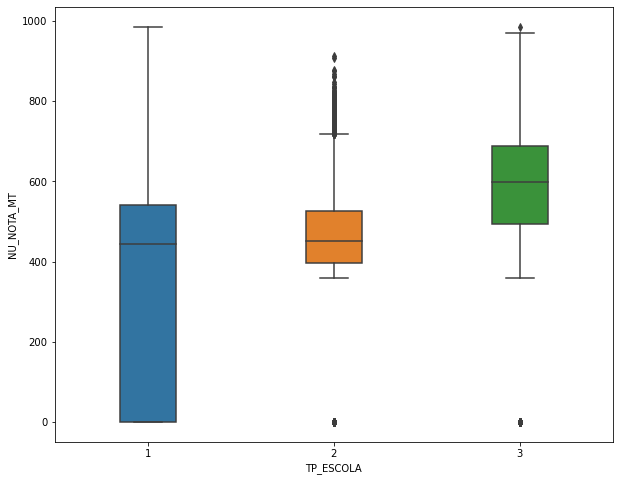

In [79]:
ax = sns.boxplot(y=df.NU_NOTA_MT, x=df.TP_ESCOLA, orient='v', width=0.3)

1) Escola desconhecida

2) Escola pública

3) Escola particular

**Assim, vemos que os alunos de scola particular possuem as maiores notas.**

**Como é a relação entre as notas nas outras áreas e a nota de matemática? E como é a relação do tipo de escola com a nota de matemática?**

Text(0.5, 1.05, 'Dispersão entre os parâmetros')

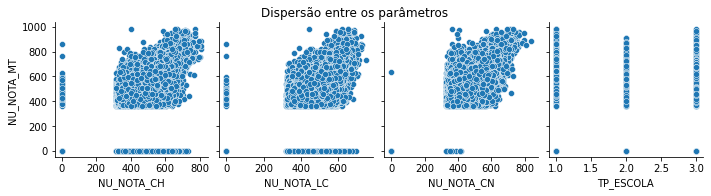

In [91]:

ax = sns.pairplot(df, y_vars='NU_NOTA_MT', x_vars=['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'TP_ESCOLA'], diag_kind=None)
ax.fig.suptitle('Dispersão entre os parâmetros', y=1.05)

**Com isso, podemos verificar se temos uma correlação forte entre esses valores mais tarde**

**Agora, vamos ver se a escolaridade pode interferir na correlação das notas**

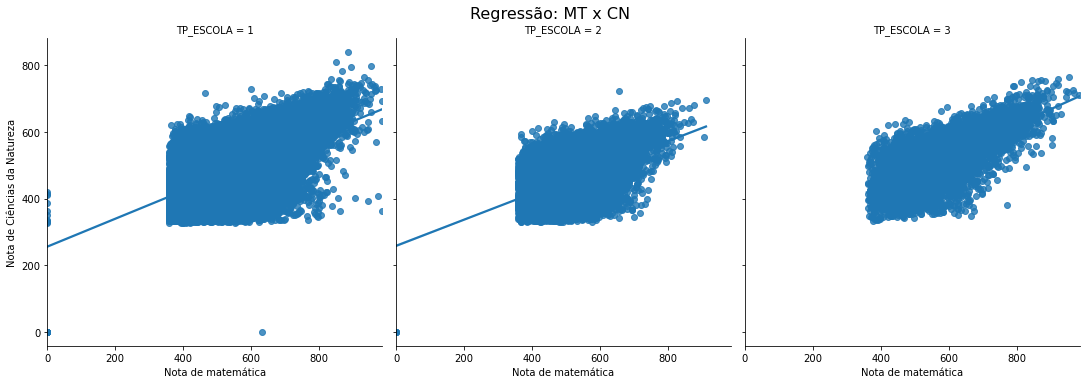

In [97]:
ax = sns.lmplot(x='NU_NOTA_MT', y='NU_NOTA_CN', data=df, col='TP_ESCOLA')
ax.fig.suptitle('Regressão: MT x CN', fontsize=16, y=1.02)
ax.set_xlabels('Nota de matemática')
ax.set_ylabels('Nota de Ciências da Natureza')
ax

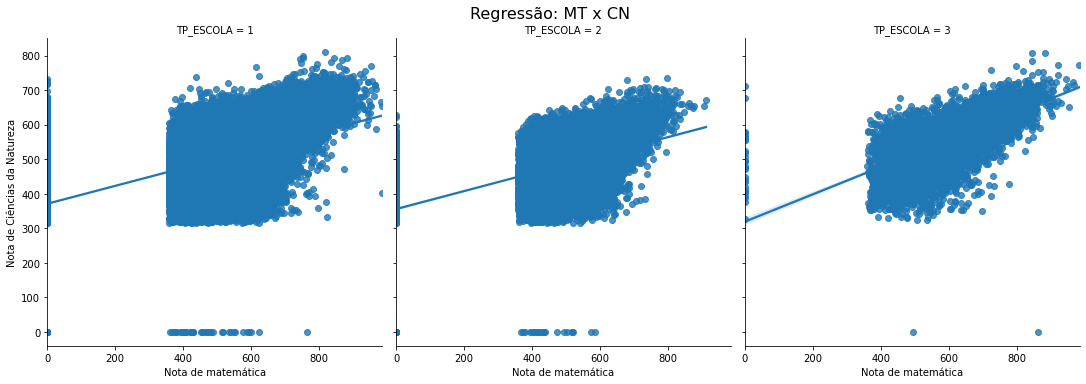

In [98]:
ax = sns.lmplot(x='NU_NOTA_MT', y='NU_NOTA_CH', data=df, col='TP_ESCOLA')
ax.fig.suptitle('Regressão: MT x CN', fontsize=16, y=1.02)
ax.set_xlabels('Nota de matemática')
ax.set_ylabels('Nota de Ciências da Natureza')
ax

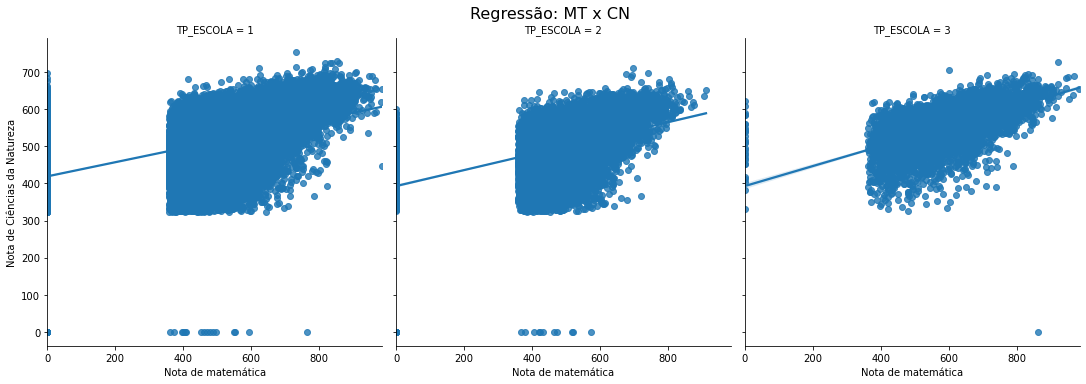

In [100]:
ax = sns.lmplot(x='NU_NOTA_MT', y='NU_NOTA_LC', data=df, col='TP_ESCOLA')
ax.fig.suptitle('Regressão: MT x CN', fontsize=16, y=1.02)
ax.set_xlabels('Nota de matemática')
ax.set_ylabels('Nota de Ciências da Natureza')
ax

**Podemos observar que a correlação fica mais forte para alunos de escola particular (TP_ESCOLA=3)**

**Vamos começar a preparar nosso dataset então para o treinamento do modelo. Para isso, vamos selecionar as colunas que provavelmente serão mais influenciadoras na determinação do nosso alvo**

In [132]:
df_train = df[['TP_ESCOLA', 'NU_IDADE', 'TP_PRESENCA_CH', 'TP_PRESENCA_CN',
               'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_LC',
               'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
               'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ENSINO', 'IN_TREINEIRO',
               'TP_STATUS_REDACAO']]
df_train.head()

,TP_ESCOLA,NU_IDADE,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,TP_STATUS_REDACAO
0,1,19,0,0,0,0,NaN,NaN,NaN,0.0,NaN,1,1,1.0,0,NaN
1,1,21,1,1,1,1,422.1,358.0,500.2,569.0,800.0,1,3,1.0,0,1.0
2,1,18,1,1,1,1,576.4,555.8,573.5,542.2,680.0,1,1,1.0,0,1.0
3,1,50,1,1,1,1,481.5,488.7,517.8,370.5,440.0,1,13,1.0,0,1.0
4,1,34,0,0,0,0,NaN,NaN,NaN,0.0,NaN,1,13,1.0,0,NaN


# Feature selection

In [133]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147001 entries, 0 to 147000
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TP_ESCOLA          147001 non-null  int64  
 1   NU_IDADE           147001 non-null  int64  
 2   TP_PRESENCA_CH     147001 non-null  int64  
 3   TP_PRESENCA_CN     147001 non-null  int64  
 4   TP_PRESENCA_LC     147001 non-null  int64  
 5   TP_PRESENCA_MT     147001 non-null  int64  
 6   NU_NOTA_LC         118258 non-null  float64
 7   NU_NOTA_CN         113611 non-null  float64
 8   NU_NOTA_CH         118258 non-null  float64
 9   NU_NOTA_MT         147001 non-null  float64
 10  NU_NOTA_REDACAO    118258 non-null  float64
 11  TP_ST_CONCLUSAO    147001 non-null  int64  
 12  TP_ANO_CONCLUIU    147001 non-null  int64  
 13  TP_ENSINO          87836 non-null   float64
 14  IN_TREINEIRO       147001 non-null  int64  
 15  TP_STATUS_REDACAO  118258 non-null  float64
dtypes:

In [134]:
min_LC = df_train['NU_NOTA_LC'].min()
df_train.update(df['NU_NOTA_LC'].fillna(min_LC))

min_CN = df_train['NU_NOTA_CN'].min()
df_train.update(df['NU_NOTA_CN'].fillna(min_CN))

min_CH = df_train['NU_NOTA_CH'].min()
df_train.update(df['NU_NOTA_CH'].fillna(min_CH))

min_RED = df_train['NU_NOTA_REDACAO'].min()
df_train.update(df['NU_NOTA_REDACAO'].fillna(min_RED))


In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147001 entries, 0 to 147000
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TP_ESCOLA          147001 non-null  int64  
 1   NU_IDADE           147001 non-null  int64  
 2   TP_PRESENCA_CH     147001 non-null  int64  
 3   TP_PRESENCA_CN     147001 non-null  int64  
 4   TP_PRESENCA_LC     147001 non-null  int64  
 5   TP_PRESENCA_MT     147001 non-null  int64  
 6   NU_NOTA_LC         147001 non-null  float64
 7   NU_NOTA_CN         147001 non-null  float64
 8   NU_NOTA_CH         147001 non-null  float64
 9   NU_NOTA_MT         147001 non-null  float64
 10  NU_NOTA_REDACAO    147001 non-null  float64
 11  TP_ST_CONCLUSAO    147001 non-null  int64  
 12  TP_ANO_CONCLUIU    147001 non-null  int64  
 13  TP_ENSINO          87836 non-null   float64
 14  IN_TREINEIRO       147001 non-null  int64  
 15  TP_STATUS_REDACAO  118258 non-null  float64
dtypes:

In [136]:
df_train = df_train.drop(columns=['TP_ENSINO'], axis=1)

In [137]:
df_train['TP_STATUS_REDACAO'].unique()

array([nan,  1.,  4.,  3.,  8.,  9.,  6.,  2.,  7.])

Redações sem valores irei substituir por 4 (redação em branco)

In [138]:
df_train.update(df['TP_STATUS_REDACAO'].fillna(4))

In [139]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147001 entries, 0 to 147000
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TP_ESCOLA          147001 non-null  int64  
 1   NU_IDADE           147001 non-null  int64  
 2   TP_PRESENCA_CH     147001 non-null  int64  
 3   TP_PRESENCA_CN     147001 non-null  int64  
 4   TP_PRESENCA_LC     147001 non-null  int64  
 5   TP_PRESENCA_MT     147001 non-null  int64  
 6   NU_NOTA_LC         147001 non-null  float64
 7   NU_NOTA_CN         147001 non-null  float64
 8   NU_NOTA_CH         147001 non-null  float64
 9   NU_NOTA_MT         147001 non-null  float64
 10  NU_NOTA_REDACAO    147001 non-null  float64
 11  TP_ST_CONCLUSAO    147001 non-null  int64  
 12  TP_ANO_CONCLUIU    147001 non-null  int64  
 13  IN_TREINEIRO       147001 non-null  int64  
 14  TP_STATUS_REDACAO  147001 non-null  float64
dtypes: float64(6), int64(9)
memory usage: 16.8 MB


**Com os dados prontos para serem analisados, vamos observar a correlação de cada um com nossa variavel alvo (NU_NOTA_MT)**

In [144]:
correlacao = df_train.corrwith(df_train['NU_NOTA_MT']).iloc[:-1].to_frame()
correlacao

,0
TP_ESCOLA,0.156700
NU_IDADE,-0.215830
TP_PRESENCA_CH,0.823004
TP_PRESENCA_CN,0.915212
TP_PRESENCA_LC,0.823004
TP_PRESENCA_MT,0.915212
NU_NOTA_LC,0.866805
NU_NOTA_CN,0.948575
NU_NOTA_CH,0.870415
NU_NOTA_MT,1.000000


In [154]:
correlacao['abs'] = correlacao[0].abs()
correlacao

,0,abs
TP_ESCOLA,0.156700,0.156700
NU_IDADE,-0.215830,0.215830
TP_PRESENCA_CH,0.823004,0.823004
TP_PRESENCA_CN,0.915212,0.915212
TP_PRESENCA_LC,0.823004,0.823004
TP_PRESENCA_MT,0.915212,0.915212
NU_NOTA_LC,0.866805,0.866805
NU_NOTA_CN,0.948575,0.948575
NU_NOTA_CH,0.870415,0.870415
NU_NOTA_MT,1.000000,1.000000


<AxesSubplot:>

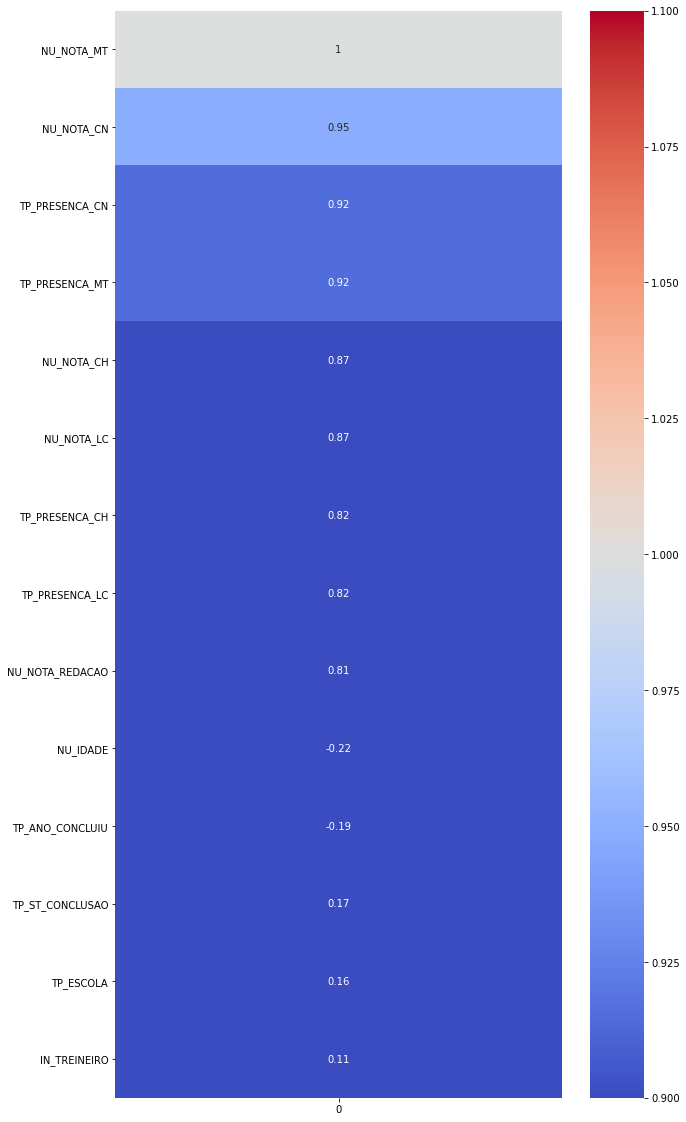

In [157]:
corr_ord = correlacao.sort_values('abs', ascending=False)[0]

fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(corr_ord.to_frame(), cmap='coolwarm', annot=True, vmin=1, vmax=1, ax=ax)


**Podemos eliminar as colunas TP_PRESENCA*, pois se há uma nota, então o participante estava presente**

# Hora de treinar nosso modelo

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [162]:
y_data = df_train['NU_NOTA_MT']
x_data = df_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'TP_PRESENCA_MT']]

In [163]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.3)

In [165]:
X_train.shape

(102900, 5)

In [167]:
X_test.shape

(44101, 5)

In [168]:
model.fit(X_train, Y_train)

LinearRegression()

In [169]:
print('R²: {}'.format(model.score(X_train, Y_train)))

R²: 0.9085003733394269


In [170]:
pred = model.predict(X_test)

In [171]:
print('R² do teste: {}'.format(metrics.r2_score(Y_test, pred).round(3)))

R² do teste: 0.908


# Futuramente, aqui colocarei algumas estratégias de melhoramento, como hyperparam tunning e cross validation

**Vamos analisar os valores de treino**

In [173]:
import numpy as np

index = ['INTERCEPT', 'CN_SLOPE', 'CH_SLOPE', 'LC_SLOPE', 'RED_SLOPE', 'PRE_MT_SLOPE']

pd.DataFrame(data=np.append(model.intercept_,model.coef_), index=index, columns=['Parâmetros'])


,Parâmetros
INTERCEPT,-6.992192
CN_SLOPE,0.748775
CH_SLOPE,0.138180
LC_SLOPE,-0.093314
RED_SLOPE,0.082837
PRE_MT_SLOPE,97.361930


**Vemos que a presença do aluno na prova é o parâmetro que mais pesa para a nota, o que faz total sentido**

In [175]:
y_pred_train = model.predict(X_train)

<AxesSubplot:title={'center':'Nota de MT - Previsão x Real'}, xlabel='Nota de MT - Previsão', ylabel='Nota de MT - Real'>

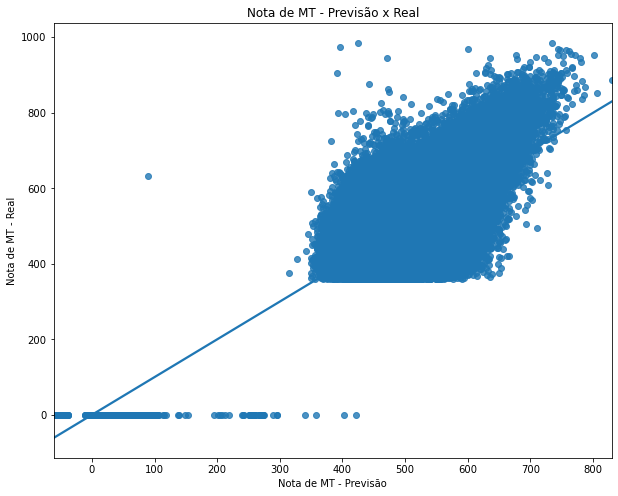

In [179]:
ax = sns.regplot(x = y_pred_train, y=Y_train)
ax.set_title('Nota de MT - Previsão x Real')
ax.set_xlabel('Nota de MT - Previsão')
ax.set_ylabel('Nota de MT - Real')
ax

In [180]:
y_predict = model.predict(X_test)

In [182]:
print("Modelo de teste com todos os atributos")
print("R quadrado = {}".format(metrics.r2_score(Y_test,y_predict).round(2)))

Modelo de teste com todos os atributos
R quadrado = 0.91


In [184]:
eqm = metrics.mean_squared_error(Y_test, y_predict)
eqm

4972.011738419011

**Vamos agora testar nosso modelo com os valores do conjunto de teste que não foi utilizado no treino**

In [185]:
df_test.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025 \n
0,32887,190001037515,2019,2507507,João Pessoa,25,PB,22,M,1,...,B,A,B,C,A,A,B,A,B,B \n
1,120797,190001125426,2019,2504009,Campina Grande,25,PB,19,M,1,...,B,A,A,B,A,A,C,A,A,B \n
2,136437,190001141066,2019,2516607,Tavares,25,PB,21,F,1,...,B,A,A,D,B,A,E,A,C,B \n
3,136644,190001141273,2019,2502409,Bonito de Santa Fé,25,PB,36,M,1,...,A,A,A,B,B,A,B,A,A,B \n
4,160454,190001165087,2019,2514503,São José de Piranhas,25,PB,20,F,1,...,A,A,A,B,B,A,C,A,A,B \n


In [188]:
test = df_test[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','TP_PRESENCA_MT']]

In [190]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_CN       624 non-null    float64
 1   NU_NOTA_CH       643 non-null    float64
 2   NU_NOTA_LC       643 non-null    float64
 3   NU_NOTA_REDACAO  643 non-null    float64
 4   TP_PRESENCA_MT   779 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.6 KB


In [193]:
min_LC = test['NU_NOTA_LC'].min()
test.update(test['NU_NOTA_LC'].fillna(min_LC))

min_CN = test['NU_NOTA_CN'].min()
test.update(test['NU_NOTA_CN'].fillna(min_CN))

min_CH = test['NU_NOTA_CH'].min()
test.update(test['NU_NOTA_CH'].fillna(min_CH))

min_RED = test['NU_NOTA_REDACAO'].min()
test.update(test['NU_NOTA_REDACAO'].fillna(min_RED))

In [194]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_CN       779 non-null    float64
 1   NU_NOTA_CH       779 non-null    float64
 2   NU_NOTA_LC       779 non-null    float64
 3   NU_NOTA_REDACAO  779 non-null    float64
 4   TP_PRESENCA_MT   779 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.6 KB


In [208]:
mt_predict = model.predict(test)

df_test.update(df_test['NU_NOTA_MT'].fillna(0))


In [236]:
index = df_test['NU_NOTA_MT']
arr = []
result = pd.DataFrame(data=np.append(arr, mt_predict), index=index, columns=['Previsão'])


In [269]:
result.sample()

,Previsão
NU_NOTA_MT,
523.6,458.524366
